First we are importing all the libraries.
*%matplotlib inline ensures plots appear inside the notebook.

In [1]:
# Import essential libraries
import numpy as np  # For numerical operations
import pandas as pd  # For handling datasets
import matplotlib.pyplot as plt  # For visualization
import seaborn as sns  # For enhanced plots
from sklearn.model_selection import train_test_split  # For splitting data
from sklearn.linear_model import LinearRegression  # ML Model
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score  # Model evaluation

# Display plots in the notebook
%matplotlib inline


Loading the dataset

In [2]:
# Load dataset from CSV
df = pd.read_csv("BostonHousing.csv")

# Show first few rows
df.head()


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


Checking dataset info

In [3]:
df.info()
df.describe()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       501 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


(506, 14)

In [14]:
print("Missing values before dropping:")
print(df.isnull().sum())

# Remove rows with any missing (NaN) values
df.dropna(inplace=True)

# Optional: Reset index after dropping
df.reset_index(drop=True, inplace=True)

# After dropping
print("\nMissing values after dropping:")
print(df.isnull().sum())

Missing values before dropping:
crim       0
zn         0
indus      0
chas       0
nox        0
rm         5
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64

Missing values after dropping:
crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64


Visualizing the data

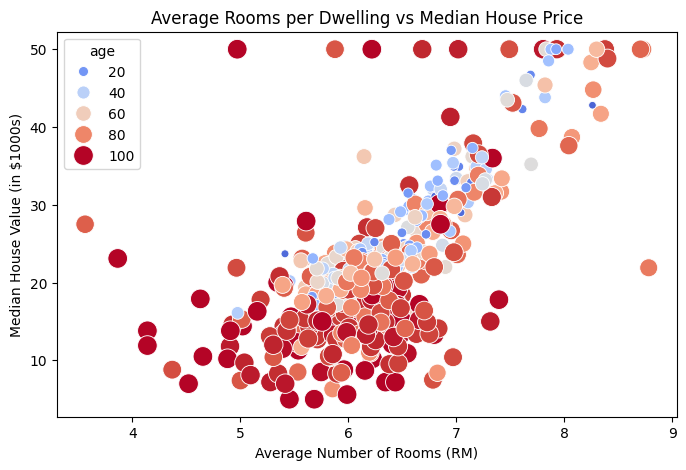

In [ ]:
# Scatter plot of Rooms vs Price
plt.figure(figsize=(8,5))
sns.scatterplot(
    x=df['rm'],               # average number of rooms per dwelling
    y=df['medv'],             # median house value ($1000s)
    hue=df['age'],            # color based on age of building
    size=df['age'],           # size of points based on age
    palette='coolwarm',
    sizes=(20, 200)
)
plt.title("Average Rooms per Dwelling vs Median House Price")
plt.xlabel("Average Number of Rooms (RM)")
plt.ylabel("Median House Value (in $1000s)")

plt.show()


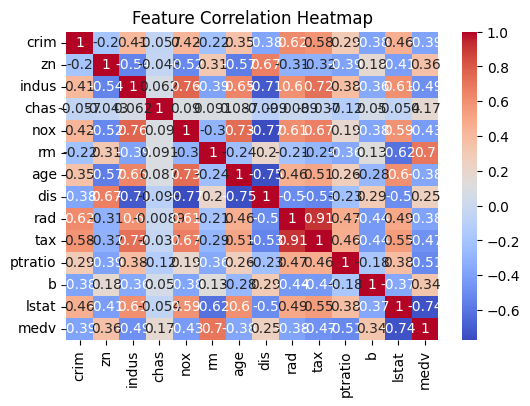

In [16]:
# Correlation heatmap
plt.figure(figsize=(6,4))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()


Step 6: Preparing the data
First, we will select the features and the target
Then, Split the data into training and testing data

In [ ]:
X = df[['rm', 'lstat', 'ptratio', 'indus', 'nox']]  # you can choose more features as needed
y = df['medv']  # Median value of owner-occupied homes in $1000s


In [18]:
# Split into training (80%) and testing (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, y_train.shape

((400, 5), (400,))

Step 7: Now we will train the Linear Regression Model
In this model, 
model.fit(X_train, y_train) trains the model.
.coef_ gives the importance of each feature.
.intercept_ gives the bias term.

In [19]:
model = LinearRegression()

# Train the model on training data
model.fit(X_train, y_train)

# Display model coefficients (weights)
print("Model Coefficients:", model.coef_)
print("Model Intercept:", model.intercept_)

Model Coefficients: [ 4.71966178 -0.62238122 -0.90639761  0.08338509 -2.77123499]
Model Intercept: 18.193492206115742


Step 8: Make predictions

In [20]:
y_pred = model.predict(X_test)

predictions = pd.DataFrame({'Actual':y_test, 'Predicted' :y_pred})
predictions


,Actual,Predicted
362,23.1,9.580593
73,20.0,23.287511
375,10.4,21.709454
155,27.0,30.900320
104,19.8,21.440989
...,...,...
86,28.7,30.851737
75,21.2,22.835406
439,10.8,12.165268
15,23.1,22.262897


Step 9: Evaluating the model
Mean Absolute Error (MAE): Average error in absolute terms.
Mean Squared Error (MSE): Penalizes large errors more.
Root Mean Squared Error (RMSE): Same unit as the output.
R² Score: Closer to 1 means a better model.

In [21]:
# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R² Score: {r2}")


Mean Absolute Error: 3.8044479421820574
Mean Squared Error: 24.919616296553027
Root Mean Squared Error: 4.99195515770655
R² Score: 0.6627564352603976


Step 10: Visualise Predictions

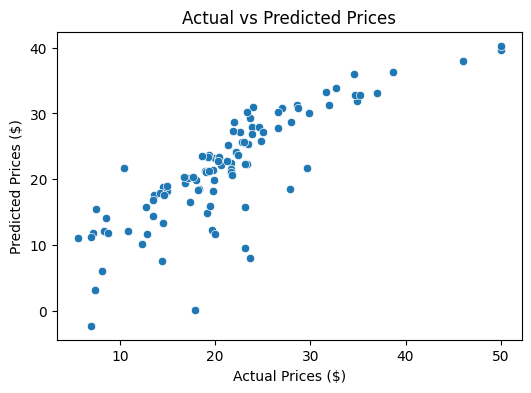

In [22]:
# Plot actual vs predicted prices
plt.figure(figsize=(6,4))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual Prices ($)")
plt.ylabel("Predicted Prices ($)")
plt.title("Actual vs Predicted Prices")
plt.show()
